In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import torchvision.transforms as T
from torchvision import datasets
from torchvision.utils import make_grid

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

seed_everything(42)

In [ ]:
dataset = datasets.CIFAR10(root='data/', train=True, download=True, transform=T.ToTensor())
test_dataset = datasets.CIFAR10(root='data/', train=False, download=False, transform=T.ToTensor())


Extracting data/cifar-10-python.tar.gz to data/


In [ ]:
labels = dataset.classes
labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
num_classes = len(labels)
num_classes

10

In [ ]:
class_count = {}
for _, prediction in dataset:
    label = labels[prediction]
    class_count[label] = class_count.get(label, 0) + 1
class_count

{'airplane': 5000,
 'automobile': 5000,
 'bird': 5000,
 'cat': 5000,
 'deer': 5000,
 'dog': 5000,
 'frog': 5000,
 'horse': 5000,
 'ship': 5000,
 'truck': 5000}

In [ ]:
class_count = {}
for _, prediction in test_dataset:
    label = labels[prediction]
    class_count[label] = class_count.get(label, 0) + 1
class_count

{'airplane': 1000,
 'automobile': 1000,
 'bird': 1000,
 'cat': 1000,
 'deer': 1000,
 'dog': 1000,
 'frog': 1000,
 'horse': 1000,
 'ship': 1000,
 'truck': 1000}

In [ ]:
train_loader = DataLoader(dataset=dataset, batch_size=64, shuffle=True)


def get_mean_std(data_loader):
    # var[X] = E[X**2] - E[X]**2
    channels_sum, channels_squared_sum, num_batches = 0, 0, 0

    for data, _ in tqdm(data_loader):
        channels_sum += torch.mean(data, dim=[0, 2, 3])
        channels_squared_sum += torch.mean(data ** 2, dim=[0, 2, 3])
        num_batches += 1

    mean = channels_sum / num_batches
    std = (channels_squared_sum / num_batches - mean ** 2) ** 0.5

    return mean, std

mean, std = get_mean_std(train_loader)
print(f'Mean RGB: {mean}, Std RGB: {std}')

100%|██████████| 782/782 [00:06<00:00, 117.42it/s]

Mean RGB: tensor([0.4914, 0.4821, 0.4465]), Std RGB: tensor([0.2470, 0.2435, 0.2616])


In [ ]:
def show_sample(img, label):
    plt.imshow(img.permute((1, 2, 0)))
    print('Image shape:', img.shape)
    print('Label (numeric):', label)
    print('Label (textual):', labels[label])

Image shape: torch.Size([3, 32, 32])
Label (numeric): 8
Label (textual): ship


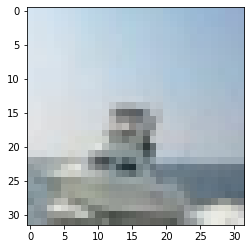

In [ ]:
show_sample(*dataset[100])

Image shape: torch.Size([3, 32, 32])
Label (numeric): 6
Label (textual): frog


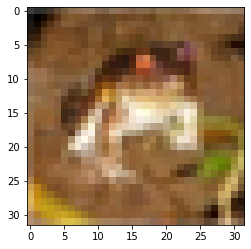

In [ ]:
show_sample(*dataset[0])

In [ ]:
def show_batch(data_loader):
    images, targets = next(iter(data_loader))
    plt.figure(figsize=(16, 8))
    for i in range(28):
        ax = plt.subplot(4, 7, i + 1)
        ax.imshow(images[i].permute(1, 2, 0))
        plt.title(labels[targets[i]])
        plt.axis('off')

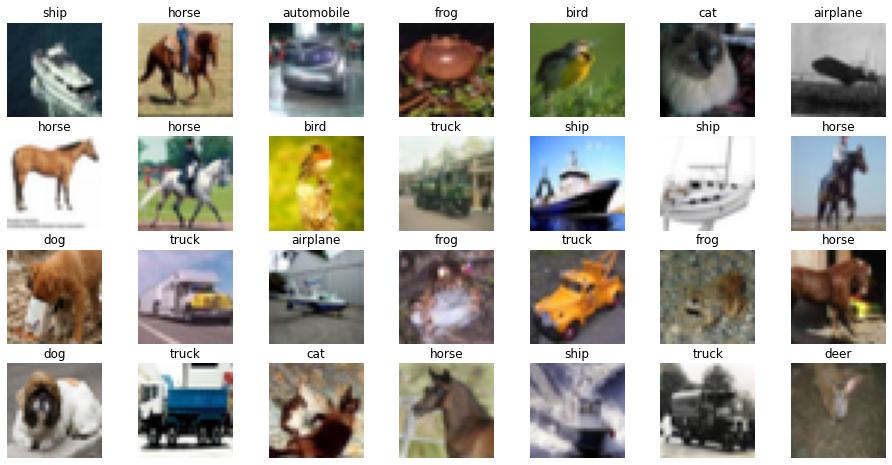

In [ ]:
show_batch(train_loader)

images.shape: torch.Size([64, 3, 32, 32])


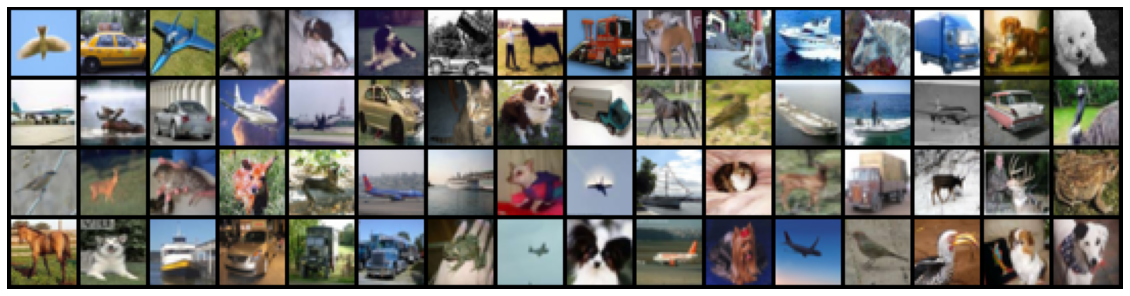

In [ ]:
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(20, 20))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break